In [7]:
### ANN implementation

In [8]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [9]:
# import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()
# Binary classification problem
# tensorflow 2.x have keras integrated with it

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
## Divide the dataset into Independent and dependent features

X = dataset.iloc[:,3:-1]
y = dataset.iloc[:,-1]


In [12]:
## Feature Engineering
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)


In [13]:
## Concatenate these variable with dataframe

X = X.drop(["Geography","Gender"], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [14]:
X = pd.concat([X, geography, gender], axis=1)

In [15]:
# splitting the dataset into training and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [16]:
# Feature scaling
# Data rotates around mean and standard deviation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [17]:
X_train.shape

(8000, 11)

In [18]:
### Let's create ANN

In [19]:
# We take entire neural nets block and can do forward and back propagation
from tensorflow.keras.models import Sequential
# Whenever we create circle of neuron we use Dense layer
# With the help of dense layer, we will be able to create input layer, hidden and output layer

from tensorflow.keras.layers import Dense
# Activation function in hidden layer
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
# sometimes, it prone to overfitting
# DropOut is like regularization parameter,
# 0.3 means, 30% neuron gets deactivated   
from tensorflow.keras.layers import Dropout


In [20]:
# Let's initialise ANN

classifier = Sequential()

In [21]:
# Adding the input layer
# (8000, 11) as there is 11 feature, we need to have 11 nodes in input

classifier.add(Dense(units=11, activation='relu'))

In [22]:
# adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [23]:
# add 2nd hidden layer
classifier.add(Dense(units=6, activation='relu'))


In [24]:
# output layer
classifier.add(Dense(units=1, activation='sigmoid'))


In [25]:
# train and compile
# by default, adam take learning rate 0.01
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
## Use early stopping
# it helps model to stop automatically when certain level gets reached
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
  
)

In [27]:
# model history
# Have to use early stopping
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000,callbacks=early_stopping)
 

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4943 - accuracy: 0.7985 - val_loss: 0.4586 - val_accuracy: 0.8054
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4368 - accuracy: 0.8151 - val_loss: 0.4328 - val_accuracy: 0.8126
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4147 - accuracy: 0.8237 - val_loss: 0.4149 - val_accuracy: 0.8190
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3975 - accuracy: 0.8356 - val_loss: 0.4008 - val_accuracy: 0.8273
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3790 - accuracy: 0.8489 - val_loss: 0.3817 - val_accuracy: 0.8410
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8539 - val_loss: 0.3699 - val_accuracy: 0.8421
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3522 - accuracy: 0.8567 - val_loss: 0.3682 - val_accuracy:

In [28]:
## Automatically, training has stopped

In [30]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

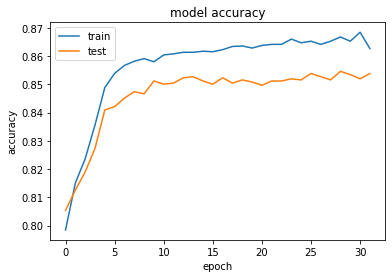

In [33]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc='upper left')
plt.show()

In [34]:
# See the graph and the power of early stopping, it will stop after the distance between val acc and accuracy start to increase

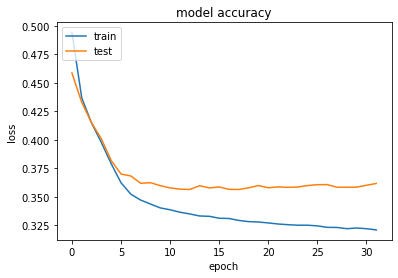

In [37]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc='upper left')
plt.show()

In [ ]:
# Making the prediction and evaluting the model

In [36]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [38]:
## make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1503   92]
 [ 204  201]]


In [39]:
## calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.852

In [40]:
## get the weights
classifier.get_weights()

[array([[ 0.1034753 , -0.00856471,  0.08176138,  0.3425127 , -0.03882764,
         -0.25632948,  0.31146806,  0.04893654, -0.47639576, -0.07248606,
          0.10724743],
        [-0.259834  ,  0.6252471 , -0.00781011, -0.20497732,  0.93648434,
          0.5591554 , -0.29801965, -0.35828924, -0.02209959,  0.99255407,
         -0.32197544],
        [ 0.1757139 , -0.10692365, -0.03884666,  0.28306815,  0.00896155,
         -0.40717512, -0.14310336, -0.2457543 ,  0.13961796,  0.09875306,
         -0.10856111],
        [ 0.14150472, -0.2667125 ,  0.4920495 , -0.37033325, -0.31356648,
         -0.5058496 , -0.15885477,  0.62269014, -0.03673565,  0.47323543,
          0.2608415 ],
        [ 0.64128315, -0.7923027 ,  1.1827086 ,  0.4193065 ,  0.6369941 ,
          0.09585156,  0.38595515, -0.23741063,  0.39720303, -0.17084837,
          0.4196576 ],
        [-0.08878598, -0.11206642, -0.06410167,  0.10877185, -0.0085219 ,
         -0.40077865, -0.07474754,  0.01582317, -0.3839592 ,  0.1056610